<a href="https://colab.research.google.com/github/geantrindade/ConvNet-Performance-Prediction/blob/master/notebooks/dataset_meta_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [0]:
!pip install -U pymfe

from pymfe.mfe import MFE
import datetime

import numpy as np
from numpy import savez_compressed
from numpy import load

import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize

import pandas as pd
import matplotlib.pyplot as plt

     |████████████████████████████████| 133kB 5.1MB/s 


# **Load and pre-process data**

---



In [0]:
def get_data_loaders(train_batch_size, test_batch_size):
    mnist = MNIST(download=True, train=True, root=".").train_data.float()
    
    data_transform = Compose([ToTensor(), Normalize((mnist.mean()/255,), (mnist.std()/255,))])
    #data_transform = Compose([ToTensor(), Normalize((0.5,), (0.5,))])

    train_loader = DataLoader(MNIST(download=True, root=".", transform=data_transform, train=True),
                              batch_size=train_batch_size, shuffle=True)

    test_loader = DataLoader(MNIST(download=True, root=".", transform=data_transform, train=False),
                            batch_size=test_batch_size, shuffle=False)
    
    return train_loader, test_loader

In [0]:
train_loader, test_loader = get_data_loaders(60000, 10000)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


In [0]:
print("train_loader length: ", len(train_loader))
print("test_loader length: ", len(test_loader))

train_loader length:  1
test_loader length:  1


In [0]:
mnist_batch_train = next(iter(train_loader))
mnist_batch_test = next(iter(test_loader))

In [0]:
print("train batch length: ", len(mnist_batch_train))
print("train batch X shape: ", mnist_batch_train[0].shape)
print("train batch X example: ", mnist_batch_train[0])
print("train batch Y shape: ", mnist_batch_train[1].shape)
print("train batch Y example: ", mnist_batch_train[1])

print("\ntest batch X length: ", len(mnist_batch_test))
print("test batch X shape: ", mnist_batch_test[0].shape)
print("test batch X example: ", mnist_batch_test[0])
print("test batch Y shape: ", mnist_batch_test[1].shape)
print("test batch Y example: ", mnist_batch_test[1])


train batch length:  2
train batch X shape:  torch.Size([60000, 1, 28, 28])
train batch X example:  tensor([[[[-0.4240, -0.4240, -0.4240,  ..., -0.4240, -0.4240, -0.4240],
          [-0.4240, -0.4240, -0.4240,  ..., -0.4240, -0.4240, -0.4240],
          [-0.4240, -0.4240, -0.4240,  ..., -0.4240, -0.4240, -0.4240],
          ...,
          [-0.4240, -0.4240, -0.4240,  ..., -0.4240, -0.4240, -0.4240],
          [-0.4240, -0.4240, -0.4240,  ..., -0.4240, -0.4240, -0.4240],
          [-0.4240, -0.4240, -0.4240,  ..., -0.4240, -0.4240, -0.4240]]],


        [[[-0.4240, -0.4240, -0.4240,  ..., -0.4240, -0.4240, -0.4240],
          [-0.4240, -0.4240, -0.4240,  ..., -0.4240, -0.4240, -0.4240],
          [-0.4240, -0.4240, -0.4240,  ..., -0.4240, -0.4240, -0.4240],
          ...,
          [-0.4240, -0.4240, -0.4240,  ..., -0.4240, -0.4240, -0.4240],
          [-0.4240, -0.4240, -0.4240,  ..., -0.4240, -0.4240, -0.4240],
          [-0.4240, -0.4240, -0.4240,  ..., -0.4240, -0.4240, -0.4240]]],


tensor(1)
(60000, 1, 28, 28)
(60000, 28, 28)


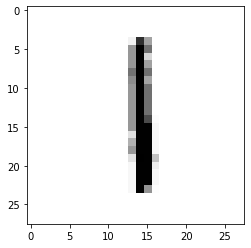

In [0]:
image_index = 0
print(mnist_batch_train[1][image_index]) #label

temp = mnist_batch_train[0].numpy()
print(temp.shape)
temp = temp.reshape((temp.shape[0], temp.shape[2], temp.shape[3]))
print(temp.shape)
plt.imshow(temp[image_index], cmap='Greys')

In [0]:
np_mnist_batch_train_X = mnist_batch_train[0].numpy()
np_mnist_batch_train_Y = mnist_batch_train[1].numpy()

np_mnist_batch_test_X = mnist_batch_test[0].numpy()
np_mnist_batch_test_Y = mnist_batch_test[1].numpy()

In [0]:
print("train batch length: ", len(np_mnist_batch_train_X))
print("train batch X shape: ", np_mnist_batch_train_X.shape)
print("train batch X example: ", np_mnist_batch_train_X[0])
print("train batch Y shape: ", np_mnist_batch_train_Y.shape)
print("train batch Y example: ", np_mnist_batch_train_Y[0])

print("\ntest batch X length: ", len(np_mnist_batch_test_X))
print("test batch X shape: ", np_mnist_batch_test_X.shape)
print("test batch X example: ", np_mnist_batch_test_X[0])
print("test batch Y shape: ", np_mnist_batch_test_Y.shape)
print("test batch Y example: ", np_mnist_batch_test_Y[0])


train batch length:  60000
train batch X shape:  (60000, 1, 28, 28)
train batch X example:  [[[-0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
   -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
   -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
   -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
   -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
   -0.42401934 -0.42401934 -0.42401934]
  [-0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
   -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
   -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
   -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
   -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
   -0.42401934 -0.42401934 -0.42401934]
  [-0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
   -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
   -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
   -0.424

In [0]:
np_mnist_batch_train_X = np_mnist_batch_train_X.reshape((np_mnist_batch_train_X.shape[0], np_mnist_batch_train_X.shape[2] * np_mnist_batch_train_X.shape[3]))
np_mnist_batch_test_X = np_mnist_batch_test_X.reshape((np_mnist_batch_test_X.shape[0], np_mnist_batch_test_X.shape[2] * np_mnist_batch_test_X.shape[3]))

In [0]:
print("train batch length: ", len(np_mnist_batch_train_X))
print("train batch X shape: ", np_mnist_batch_train_X.shape)
print("train batch X example: ", np_mnist_batch_train_X[0])
print("train batch Y shape: ", np_mnist_batch_train_Y.shape)
print("train batch Y example: ", np_mnist_batch_train_Y[0])

print("\ntest batch X length: ", len(np_mnist_batch_test_X))
print("test batch X shape: ", np_mnist_batch_test_X.shape)
print("test batch X example: ", np_mnist_batch_test_X[0])
print("test batch Y shape: ", np_mnist_batch_test_Y.shape)
print("test batch Y example: ", np_mnist_batch_test_Y[0])


train batch length:  60000
train batch X shape:  (60000, 784)
train batch X example:  [-0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934 -0.42401934
 -0.42401934 -0.42401934 -0.42401934 -

# **Meta-Feature Extraction**

In [0]:
mfe = MFE(features=["attr_ent", "attr_to_inst","can_cor", "class_conc", "class_ent", "cov", "eigenvalues", "eq_num_attr", "freq_class", "gravity", "inst_to_attr", 
                    "iq_range" , "joint_ent", "kurtosis", "mad", "max", "mean", "median", "min", "mut_inf", "nr_attr", "nr_bin", "nr_class", "nr_cor_attr", 
                    "nr_disc", "nr_inst", "nr_norm", "nr_num", "nr_outliers", "ns_ratio", "range", "sd", "skewness", "sparsity", "t_mean", "var", "w_lambda"], 
          measure_time="total")

## Training dataset

In [0]:
mfe.fit(np_mnist_batch_train_X, np_mnist_batch_train_Y)

a = datetime.datetime.now()
ft_train = mfe.extract()
b = datetime.datetime.now()

In [0]:
print("\n".join("{:30} {:30} {:30}".format(x, y, z) for x, y, z in zip(ft_train[0], ft_train[1], ft_train[2])))
print("\nnumber of meta-features: ", len(ft_train[0]))
print("total time: ", b-a)

attr_ent.kurtosis                         -1.1219695647099106          1.430511474609375e-06
attr_ent.max                                3.755220413208008          1.430511474609375e-06
attr_ent.mean                              1.1245976686477661          1.430511474609375e-06
attr_ent.median                            0.3673746883869171          1.430511474609375e-06
attr_ent.min                                              0.0          1.430511474609375e-06
attr_ent.sd                                1.3028632402420044          1.430511474609375e-06
attr_ent.skewness                          0.7247737138293365          1.430511474609375e-06
attr_ent.var                               1.6974526643753052          1.430511474609375e-06
attr_to_inst                             0.013066666666666667          3.337860107421875e-06
can_cor.kurtosis                          -1.5673614970210135         2.1457672119140625e-06
can_cor.max                                0.8913758397102356         

## Test dataset

In [0]:
mfe.fit(np_mnist_batch_test_X, np_mnist_batch_test_Y)

a = datetime.datetime.now()
ft_test = mfe.extract()
b = datetime.datetime.now()

In [0]:
print("\n".join("{:30} {:30} {:30}".format(x, y, z) for x, y, z in zip(ft_test[0], ft_test[1], ft_test[2])))
print("\nnumber of meta-features: ", len(ft_test[0]))
print("total time: ", b-a)

attr_ent.kurtosis                         -1.0955344707663608          1.430511474609375e-06
attr_ent.max                               3.3531336784362793          1.430511474609375e-06
attr_ent.mean                               1.005646824836731          1.430511474609375e-06
attr_ent.median                            0.3026430606842041          1.430511474609375e-06
attr_ent.min                                              0.0          1.430511474609375e-06
attr_ent.sd                                1.1747077703475952          1.430511474609375e-06
attr_ent.skewness                          0.7446827329822502          1.430511474609375e-06
attr_ent.var                               1.3799383640289307          1.430511474609375e-06
attr_to_inst                                           0.0784          3.337860107421875e-06
can_cor.kurtosis                          -1.5540625613688193            1.9073486328125e-06
can_cor.max                                0.8991605043411255         

# **DataFrame creation**

In [0]:
metafeatures_dict_train = {'dataset.name' : 'mnist'}
metafeatures_dict_test = {'dataset.name' : 'mnist'}

for i in range(1, len(ft_train[0])):
  metafeatures_dict_train[str(ft_train[0][i])] = ft_train[1][i]

for i in range(1, len(ft_test[0])):
  metafeatures_dict_test[str(ft_test[0][i])] = ft_test[1][i]  

df_train = pd.DataFrame(data=metafeatures_dict_train, index=[0])
df_train.to_csv("mnist_metafeatures_train.csv", index=False)

df_test = pd.DataFrame(data=metafeatures_dict_test, index=[0])
df_test.to_csv("mnist_metafeatures_test.csv", index=False)

print(len(metafeatures_dict_train))
print(metafeatures_dict_train)
print("\n", len(metafeatures_dict_test))
print(metafeatures_dict_test)

58
{'dataset.name': 'mnist', 'attr_ent.sd': 1.3028632, 'attr_to_inst': 0.013066666666666667, 'can_cor.mean': 0.74899924, 'can_cor.sd': 0.123315595, 'class_conc.mean': 0.10027359, 'class_conc.sd': 0.13091528, 'class_ent': 3.3198709267551885, 'cov.mean': 0.040923417, 'cov.sd': 0.11500981, 'eigenvalues.mean': 0.7084394, 'eigenvalues.sd': 3.5118978, 'eq_num_attr': 34.00769883499537, 'freq_class.mean': 0.1, 'freq_class.sd': 0.0056584203, 'gravity': 15.682314, 'inst_to_attr': 76.53061224489795, 'iq_range.mean': 0.7941754, 'iq_range.sd': 1.260328, 'joint_ent.mean': 4.346847, 'joint_ent.sd': 1.2154177, 'kurtosis.mean': 3925.1074, 'kurtosis.sd': 12093.466, 'mad.mean': 0.21012574, 'mad.sd': 0.55464107, 'max.mean': 2.3698385, 'max.sd': 1.034244, 'mean.mean': 5.4588123e-05, 'mean.sd': 0.54031926, 'median.mean': -0.27016422, 'median.sd': 0.41897386, 'min.mean': -0.42401934, 'min.sd': 0.0, 'mut_inf.mean': 0.09762116, 'mut_inf.sd': 0.102586, 'nr_attr': 784, 'nr_bin': 17, 'nr_class': 10, 'nr_cor_attr'